## Seasonal factors (such as day-of-the-week and hour-of-the-day).

In [1]:
#Import the require libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import squarify
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Introduction :** In this analysis, I will use days and hours as a factor to identify the sales affected due to it. For which I will use the quantity column as a factor for the sales data, and after joining the drink dataset with the transaction data with id column as primary id I will get the price related to each sale, so I will use this also as a factor and will see how these two factors behave on different days and hour of the business. 

In [2]:
#Load the Dataset
cafe_data = pd.read_csv('/content/ci_transaction.csv')
cafe_data
Drink_data = pd.read_csv('/content/drink.csv')
Drink_data

,id,date,days_after_open,day_of_week,hours_after_open,drink_id,quantity,raining,study_area_id
0,0,2019-07-22,0,Mon,0,5,1,No,3
1,1,2019-07-22,0,Mon,0,5,1,No,1
2,2,2019-07-22,0,Mon,0,2,1,No,5
3,3,2019-07-22,0,Mon,0,2,1,No,6
4,4,2019-07-22,0,Mon,0,5,1,No,5
...,...,...,...,...,...,...,...,...,...
27709,27709,2019-12-22,153,Sun,5,14,2,No,3
27710,27710,2019-12-22,153,Sun,5,6,1,No,3
27711,27711,2019-12-22,153,Sun,5,12,1,No,0
27712,27712,2019-12-22,153,Sun,5,9,1,No,4


,id,name,unit_price
0,0,Espresso,3.5
1,1,Ristretto,3.3
2,2,Macchiato,3.8
3,3,Long Black (L),4.0
4,4,Long Black (S),3.8
5,5,Flat White (L),4.9
6,6,Flat White (S),4.0
7,7,Latte (L),4.9
8,8,Latte (S),4.0
9,9,Cappuccino (L),4.9


In [3]:
#Merge both the data by id column
Cafe_data2 = pd.merge(cafe_data, Drink_data, left_on="drink_id", right_on="id", how="left")
Cafe_data2

,id_x,date,days_after_open,day_of_week,hours_after_open,drink_id,quantity,raining,study_area_id,id_y,name,unit_price
0,0,2019-07-22,0,Mon,0,5,1,No,3,5,Flat White (L),4.9
1,1,2019-07-22,0,Mon,0,5,1,No,1,5,Flat White (L),4.9
2,2,2019-07-22,0,Mon,0,2,1,No,5,2,Macchiato,3.8
3,3,2019-07-22,0,Mon,0,2,1,No,6,2,Macchiato,3.8
4,4,2019-07-22,0,Mon,0,5,1,No,5,5,Flat White (L),4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
27709,27709,2019-12-22,153,Sun,5,14,2,No,3,14,Mocha (S),4.5
27710,27710,2019-12-22,153,Sun,5,6,1,No,3,6,Flat White (S),4.0
27711,27711,2019-12-22,153,Sun,5,12,1,No,0,12,Chai Latte (S),3.6
27712,27712,2019-12-22,153,Sun,5,9,1,No,4,9,Cappuccino (L),4.9


In [4]:
#Checking for null value in each column.
Cafe_data2.isnull().sum()

id_x                  0
date                  0
days_after_open       0
day_of_week           0
hours_after_open      0
drink_id              0
quantity              0
raining             543
study_area_id         0
id_y                  0
name                  0
unit_price            0
dtype: int64

The raining data only contain the null values, as it is not belong to my analysis i will leave this to my other teammates who is handling this topic.

<Figure size 960x640 with 0 Axes>

Text(0.5, 1.0, 'Treemap of types of coffee being sale')

(0.0, 100.0, 0.0, 100.0)

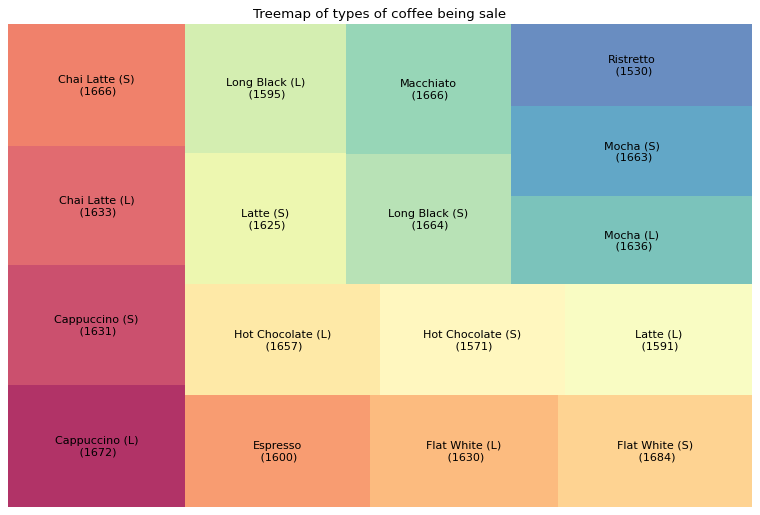

In [5]:
# Tree map for frequency of each type of coffee

df = Cafe_data2.groupby('name').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of types of coffee being sale')
plt.axis('off')
plt.show()

Here I use a treemap to analyze the frequency of types of coffee being sold in the cafe, to see is there any demand for certain products. The number present in the bracket of each block represents the numbers of time each product were ordered, From the plot, I can say that ristretto ordered the least number of time while flat white ordered most time by the customer, there are total 17 types of product but the difference is not much between the number of time each product were ordered. 

In [6]:
#Sumarize quantity and price based on days of the week.
week = Cafe_data2.groupby(['day_of_week'])['quantity','unit_price'].sum()
week = week.reset_index()
week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,day_of_week,quantity,unit_price
0,Fri,4938,16351.8
1,Mon,4683,15498.9
2,Sat,4742,15639.6
3,Sun,4748,15887.9
4,Thu,5321,17650.3
5,Tue,4984,16691.8
6,Wed,5695,18791.1


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 1.0, 'Sales contribution on different day: Pie Chart')

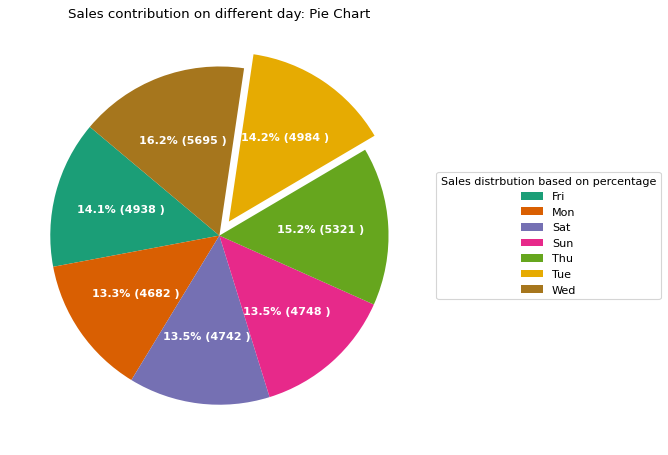

In [7]:
#Pie chart.
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = week['quantity']
categories = week['day_of_week']
explode = [0,0,0,0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sales distrbution based on percentage", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Sales contribution on different day: Pie Chart")
plt.show()

Here I use both pie chart and table to explain the sales of the cafe week wise, the sales of the cafe is maximum on Wednesday while on Monday least sale done by the cafe. if I talk in terms of percentage out of 100 16.2 percent sales is from Wednesday and 13.3 percent from Monday so the difference is only 2.9 percent which means there is no significant drop in max and min sale business day. So the sale of the cafe is not influenced by a certain day of the week.

In [8]:
#Sumarize quantity and price based on different hours.
cafe = Cafe_data2.groupby(['hours_after_open'])['quantity','unit_price'].sum()
cafe = cafe.reset_index()
cafe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,hours_after_open,quantity,unit_price
0,0,6138,20337.9
1,1,6442,21463.9
2,2,6205,20627.8
3,3,5808,19224.0
4,4,5463,17961.1
5,5,5055,16896.7


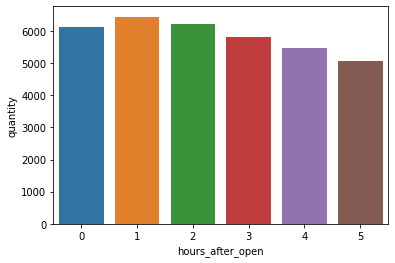

In [9]:
#Barplot for the hours sales.
sns.barplot(x = 'hours_after_open', y = 'quantity', data = cafe )

Hereby analyzing the bar plot and table I can say that the hours having an impact on the sales of the cafe because in early hours the sales is pretty high compare to late night. the cafe run in the peak in the period of 7 to 10 and most of the customer visited between 8 to 9, while at the time when the cafe is about to close the sales is least.

In [10]:
#Sumarize quantity and price based on both the days of the week and each coffee type.
week_data = Cafe_data2.groupby(['day_of_week','name'])['quantity','unit_price'].sum()
week_data = week_data.reset_index()
week_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,day_of_week,name,quantity,unit_price
0,Fri,Cappuccino (L),273,1063.3
1,Fri,Cappuccino (S),274,920.0
2,Fri,Chai Latte (L),279,950.4
3,Fri,Chai Latte (S),290,871.2
4,Fri,Espresso,310,829.5
...,...,...,...,...
114,Wed,Long Black (S),347,1010.8
115,Wed,Macchiato,324,1037.4
116,Wed,Mocha (L),321,1323.0
117,Wed,Mocha (S),357,1228.5


<Figure size 1080x432 with 0 Axes>

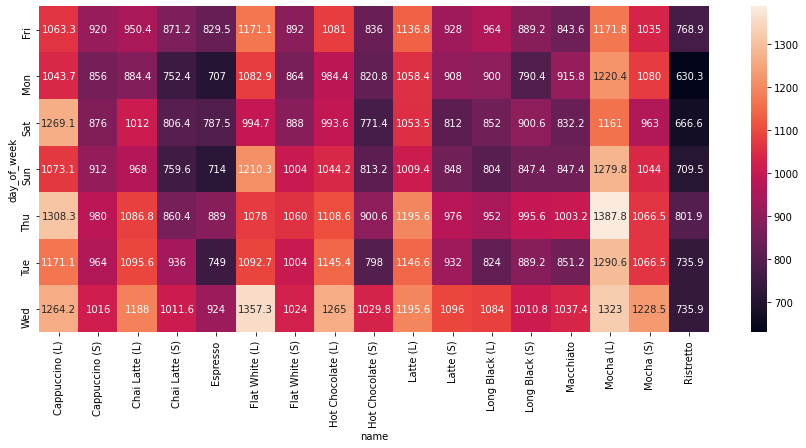

In [11]:
heatmap = pd.pivot_table(data = week_data , values="unit_price",
                         index='day_of_week',columns='name',aggfunc="sum",fill_value=0)
plt.figure(figsize=(15,6))
sns.heatmap(heatmap,annot=True,fmt="g")

In [12]:
# Sumarize quantity and price based on hours and type of different product serve to customer.
hour_data = Cafe_data2.groupby(['hours_after_open','name'])['quantity','unit_price'].sum()
hour_data = hour_data.reset_index()
hour_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,hours_after_open,name,quantity,unit_price
0,0,Cappuccino (L),346,1381.8
1,0,Cappuccino (S),325,1052.0
2,0,Chai Latte (L),386,1311.2
3,0,Chai Latte (S),381,1083.6
4,0,Espresso,381,1053.5
...,...,...,...,...
97,5,Long Black (S),312,942.4
98,5,Macchiato,291,862.6
99,5,Mocha (L),310,1339.2
100,5,Mocha (S),319,1093.5


<Figure size 1080x432 with 0 Axes>

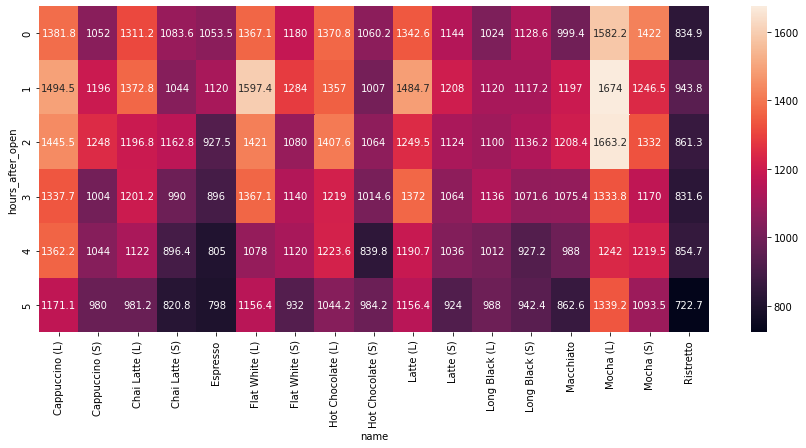

In [13]:
heatmap2 = pd.pivot_table(data = hour_data , values="unit_price",
                         index='hours_after_open',columns='name',aggfunc="sum",fill_value=0)
plt.figure(figsize=(15,6))
sns.heatmap(heatmap2,annot=True,fmt="g")

Here the above two heat maps I used for the analysis of individual sales of each product based on day and hours, to see is their impact of product too in the high and low sales record, means a product having high rate contribute more sale with less frequency. From the above two plots, the result is the same the trend of the number of individual sales is almost the same as I saw in an earlier case when I consider a summary of sales. so all the products are having the same popularity, it's nothing like any single product with a high rate contributing more sales record.


**Conclusion:** After analyzing, I can say that day of the week doesn't affect much on the sale of the cafe, because the difference in sales of all the 7 days is not significantly high to conclude that people visit during weekend more or less. But hours have much impact on the sales on the cafe because in early hours the sales are high but it starts decreasing once it near the closing time.

**Suggestion:** For other teammates, I want to suggest to them to analyze is there any impact of the study area and days since the cafe being opened on the sale of the cafe. Because from my analysis I can say hours can be used as an attribute to build a model for predicting the sale of the cafe, but this is not enough to explain variance present in the target variable, so after analyzing all the attributes we can come to conclusion that which factors are deciding for sales prediction.